In [146]:
import pandas as pd
import numpy as np
from numpy.linalg import inv
from patsy import dmatrix
from sklearn.linear_model import SGDRegressor,LinearRegression,Lasso,Ridge,RidgeCV
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error,SCORERS

In [147]:
health_df=pd.read_csv("Health_Data.csv")
scaler = StandardScaler()
health_df=pd.DataFrame(scaler.fit_transform(health_df),columns = health_df.columns)
health_df.head()

,age,income,illness,reduced,health
0,-1.056765,-0.089896,-0.312123,1.086862,-0.102414
1,-1.056765,-0.360993,-0.312123,0.394185,-0.102414
2,-1.056765,0.858945,1.132944,-0.298492,-0.573210
3,-1.056765,-1.174285,-0.312123,-0.298492,-0.573210
4,-1.056765,-0.360993,0.410410,1.433200,-0.102414


In [148]:
b0=0
b1=0
b2=0
b3=0
b4=0
alpha = 0.01
iterations = 10000
x_1 = np.array(health_df['age']) 
x_2 = np.array(health_df['income']) 
x_3 = np.array(health_df['illness']) 
x_4 = np.array(health_df['reduced']) 
y = np.array(health_df['health']) 

In [149]:
for i in range(iterations):
    predicted_y = b0 + b1*x_1 + b2*x_2 + b3*x_3 + b4*x_4
    errors = y-predicted_y
    #print(np.sum(errors))
    b0=b0+ alpha*(1/len(y))*(np.sum(errors)) 
    b1=b1+ alpha*(1/len(y))*(np.sum(errors*x_1)) 
    b2=b2+ alpha*(1/len(y))*(np.sum(errors*x_2))  
    b3=b3+ alpha*(1/len(y))*(np.sum(errors*x_3))  
    b4=b4+ alpha*(1/len(y))*(np.sum(errors*x_4)) 
    
print(b0,b1,b2,b3,b4)


6.927449408374026e-18 -0.08132296210707214 -0.0496174683283661 0.322452658653267 0.21522187186261957


In [150]:
b=np.array([0,0,0,0,0]).reshape(5,1)
X=dmatrix("age+income+illness+reduced",health_df)[:]
y = np.reshape(y, (len(y), 1)) 


In [151]:
for j in range(iterations):
        gradients = 1/(len(y)) * X.T.dot(X.dot(b) - y)
        b = b - alpha * gradients
        y_pred2 = X.dot(b)
        
print(b)

[[ 3.26110365e-17]
 [-8.13229621e-02]
 [-4.96174683e-02]
 [ 3.22452659e-01]
 [ 2.15221872e-01]]


In [152]:
label=health_df['health']
health_df.drop(columns=['health'],inplace=True)


In [155]:
SGR=SGDRegressor(fit_intercept=True,max_iter=10000,alpha=.5)
SGR.fit(health_df,label)
print(SGR.intercept_,SGR.coef_)

[-0.01033444] [-0.00808305 -0.04038402  0.23631772  0.16168212]


In [156]:
features = sm.add_constant(health_df)
model = sm.OLS(label, features)
res = model.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:                 health   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     282.9
Date:                Wed, 01 Mar 2023   Prob (F-statistic):          2.35e-220
Time:                        10:40:02   Log-Likelihood:                -6851.9
No. Observations:                5190   AIC:                         1.371e+04
Df Residuals:                    5185   BIC:                         1.375e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        4.51e-17      0.013   3.58e-15      1.0

<AxesSubplot:xlabel='fitted_values', ylabel='residuals'>

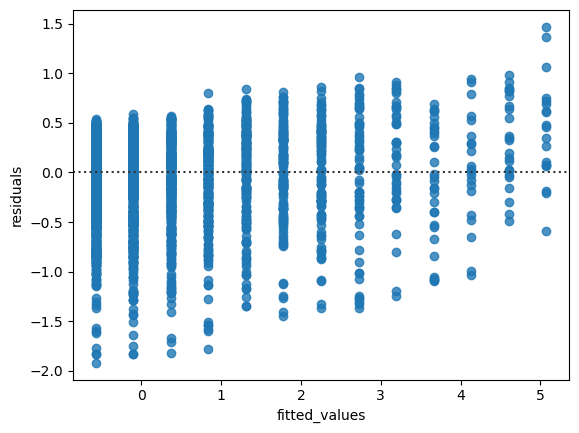

In [157]:
res_df=pd.DataFrame({'fitted_values':label,
        'residuals':res.resid,'predicted':res.predict()})
sns.residplot(data=res_df, x='fitted_values', y="residuals")

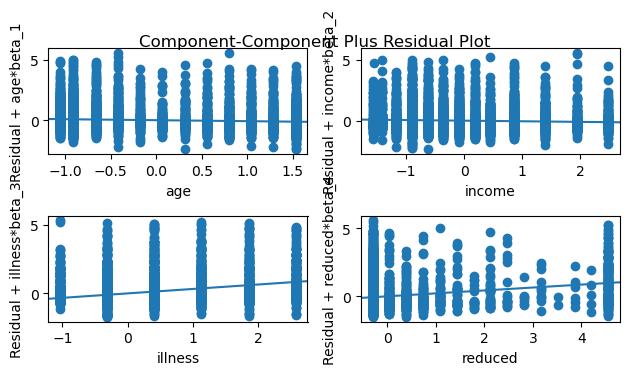

In [158]:
#fig = plt.figure(figsize=(8,6))
fig=sm.graphics.plot_ccpr_grid(res)
plt.show()

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


<Figure size 800x600 with 0 Axes>

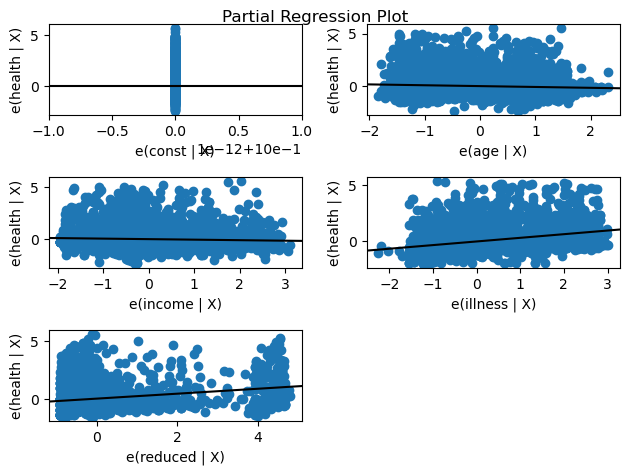

In [159]:
fig = plt.figure(figsize=(8,6))

fig = sm.graphics.plot_partregress_grid(res)
plt.show()

<AxesSubplot:xlabel='residuals', ylabel='Count'>

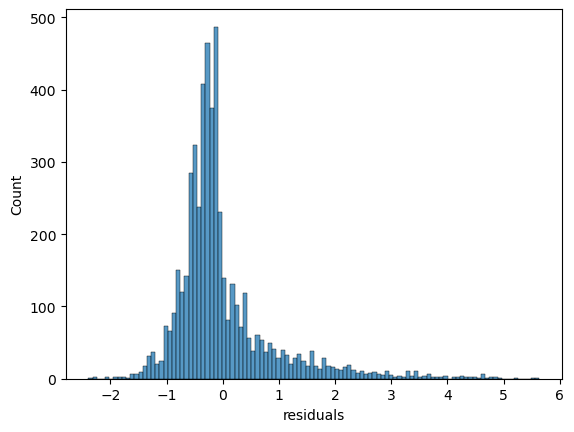

In [160]:
sns.histplot(data=res_df, x="residuals")

<AxesSubplot:xlabel='predicted', ylabel='fitted_values'>

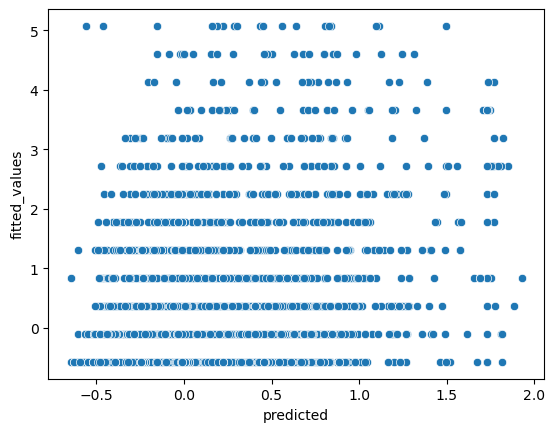

In [161]:
sns.scatterplot(data=res_df, x="predicted", y="fitted_values")


In [162]:
health_df.cov()

,age,income,illness,reduced
age,1.000193,-0.271126,0.205023,0.094763
income,-0.271126,1.000193,-0.148840,-0.047554
illness,0.205023,-0.148840,1.000193,0.218158
reduced,0.094763,-0.047554,0.218158,1.000193


In [163]:
wine_df=pd.read_csv("winequality-red.csv",sep=';')
quality_vec=wine_df['quality']
wine_df.drop(columns=['quality'],inplace=True)
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [164]:

std_df=pd.DataFrame(scaler.fit_transform(wine_df),columns = wine_df.columns)
X_train, X_test, y_train, y_test = train_test_split(wine_df, quality_vec, test_size=0.3, random_state=42)

In [165]:
lr = LinearRegression(fit_intercept=True).fit(X_train, y_train) 
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [166]:
print(mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred))

0.4207866492123616 0.41123487175041984


In [167]:
lasso = Lasso(fit_intercept=True).fit(X_train, y_train)
y_train_pred2 = lasso.predict(X_train)
y_test_pred2 = lasso.predict(X_test)


In [168]:
print(mean_squared_error(y_train, y_train_pred2),mean_squared_error(y_test, y_test_pred2))

0.6328609339732272 0.6228373487120289


In [169]:
ridge= Ridge(fit_intercept=True).fit(X_train, y_train)
y_train_pred3 = ridge.predict(X_train)
y_test_pred3 = ridge.predict(X_test)

In [170]:
print(mean_squared_error(y_train, y_train_pred3),mean_squared_error(y_test, y_test_pred3))

0.4215621163963031 0.41383827485374697


In [171]:
param_grid={'alpha':[.1,.2,.3,.4,.5,.6,.7,.8,.9,1]}
lasso_grid= GridSearchCV(lasso,param_grid,scoring='neg_mean_squared_error')
lasso_grid.fit(X_train, y_train)
print(lasso_grid.best_params_,lasso_grid.score(X_train, y_train))

{'alpha': 0.1} -0.49559916053081454


In [172]:
ridge_grid= GridSearchCV(ridge,param_grid,scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)
print(ridge_grid.best_params_,ridge_grid.score(X_train, y_train))

{'alpha': 0.8} -0.421387421733042
